1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


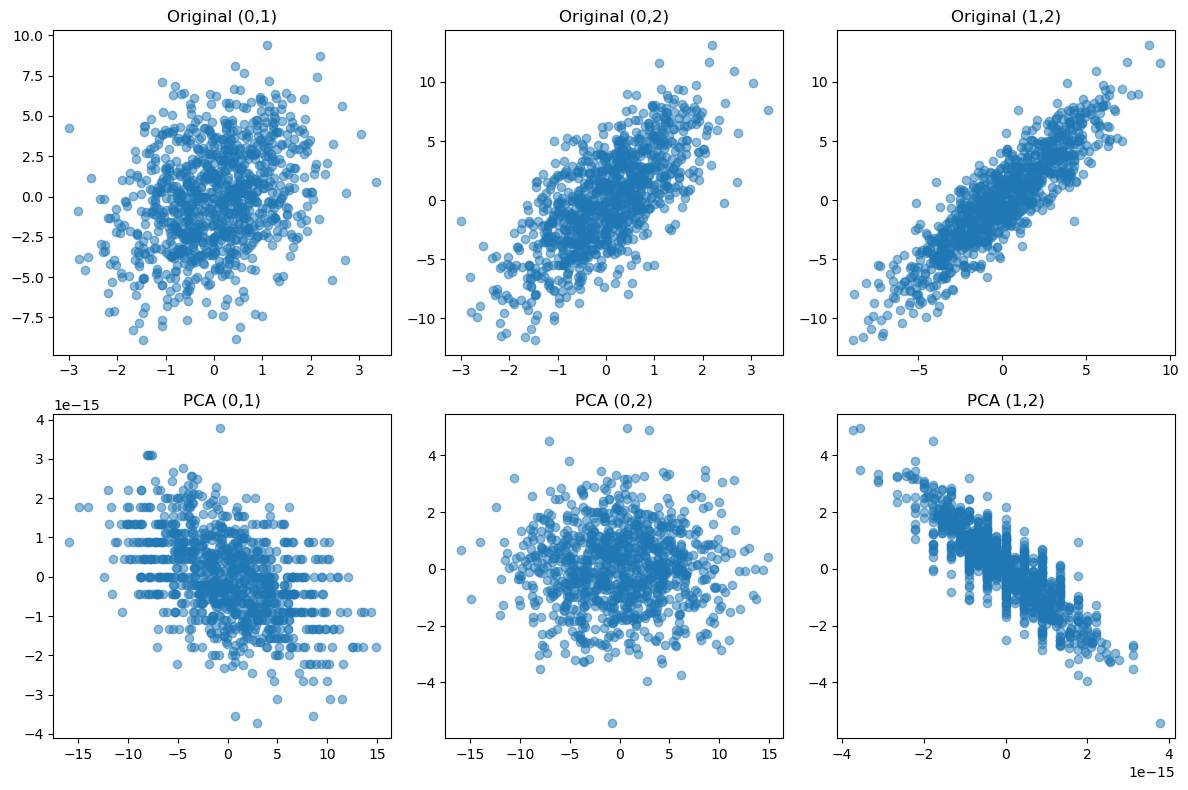

ModuleNotFoundError: No module named 'ace_tools'

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

N=1000
#variables 
x1=np.random.normal(0,1,N)
x2=np.random.normal(0,3,N) + x1
x3=2*x1+x2

X = np.vstack((x1, x2, x3))

cov_matrix = np.cov(X)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Compute SVD of the dataset
U, S, Vt = np.linalg.svd(X @ X.T / (N-1))  # Equivalent to covariance matrix

# Compute explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Find the number of components to retain 99% variance
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.99) + 1

# Transform data to PCA basis
X_pca = eigenvectors.T @ X  # New coordinates

# Plot original vs PCA-transformed data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original data projections
axes[0, 0].scatter(X[0, :], X[1, :], alpha=0.5)
axes[0, 1].scatter(X[0, :], X[2, :], alpha=0.5)
axes[0, 2].scatter(X[1, :], X[2, :], alpha=0.5)

# PCA-transformed data projections
axes[1, 0].scatter(X_pca[0, :], X_pca[1, :], alpha=0.5)
axes[1, 1].scatter(X_pca[0, :], X_pca[2, :], alpha=0.5)
axes[1, 2].scatter(X_pca[1, :], X_pca[2, :], alpha=0.5)

# Labels and titles
titles = [("(0,1)", "(0,2)", "(1,2)")]
for i in range(3):
    axes[0, i].set_title(f"Original {titles[0][i]}")
    axes[1, i].set_title(f"PCA {titles[0][i]}")

plt.tight_layout()
plt.show()

# Display results
import ace_tools as tools
import pandas as pd

results = pd.DataFrame({
    "Eigenvalues": eigenvalues,
    "Explained Variance Ratio": explained_variance_ratio
})

tools.display_dataframe_to_user(name="PCA Results", dataframe=results)



2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

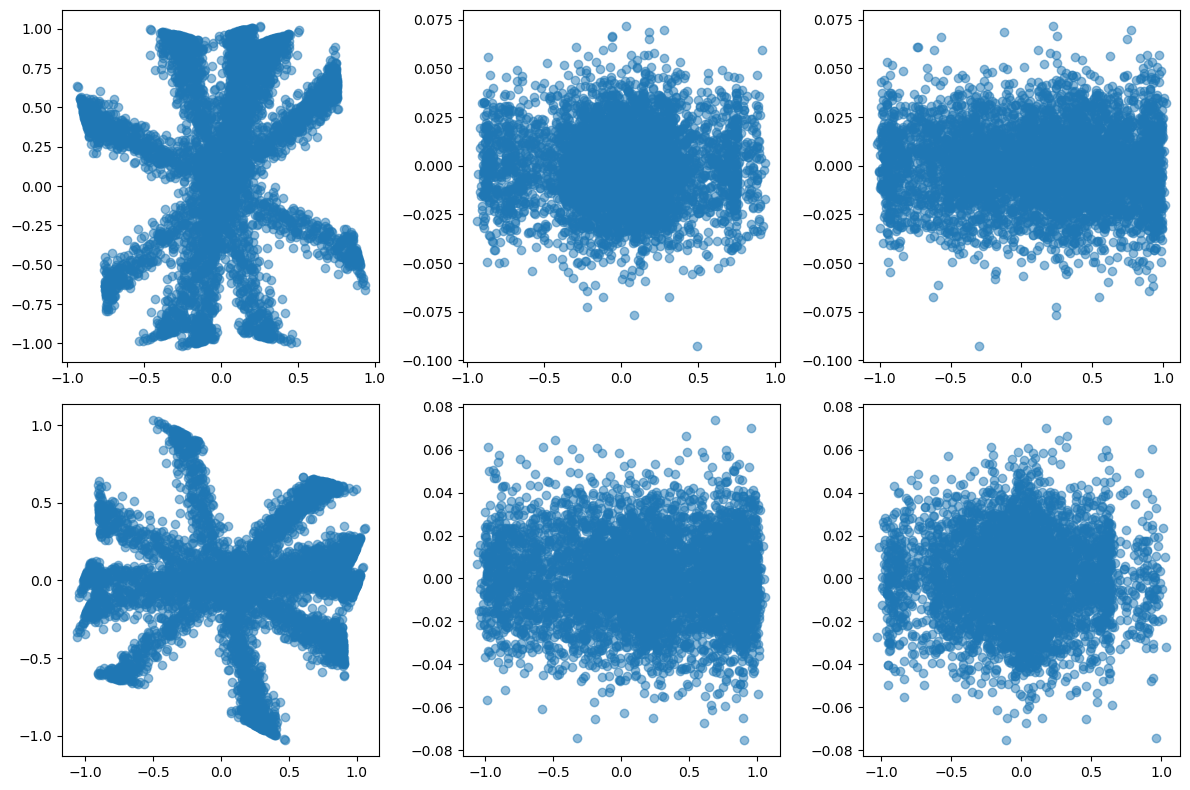

NameError: name 'tools' is not defined

In [17]:
import pandas as pd
# 1. Agregar 10 variables de ruido no correlacionado
N = X.shape[1]          # number of samples (columns)
noise = np.random.normal(0, 1/50, (10, N))
X_noisy = np.vstack((X, noise))

# noise = np.random.normal(0, 1/50, (10, N))  # Ruido con desviación estándar menor
# 2. Ampliar el dataset original con el ruido
# X_noisy = np.vstack((X, noise))
# 3. Calcular la matriz de covarianza y su descomposición en valores propios
eigvals_noisy, eigvecs_noisy = np.linalg.eig(cov_matrix_noisy)
# 4. Calcular SVD y verificar resultados
U_noisy, S_noisy, Vt_noisy = np.linalg.svd(X_noisy @ X_noisy.T / (N-1))
# 5. Proporción de varianza explicada
explained_variance_noisy = eigvals_noisy / np.sum(eigvals_noisy)
# 6. Transformar datos a la nueva base PCA
X_pca_noisy = eigvecs_noisy.T @ X_noisy
# 7. Comparación con el dataset original
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Datos originales con ruido (solo primeras 3 variables principales)
axes[0, 0].scatter(X_noisy[0], X_noisy[1], alpha=0.5)
axes[0, 1].scatter(X_noisy[0], X_noisy[2], alpha=0.5)
axes[0, 2].scatter(X_noisy[1], X_noisy[2], alpha=0.5)

# Datos transformados con ruido en la base PCA
axes[1, 0].scatter(X_pca_noisy[0], X_pca_noisy[1], alpha=0.5)
axes[1, 1].scatter(X_pca_noisy[0], X_pca_noisy[2], alpha=0.5)
axes[1, 2].scatter(X_pca_noisy[1], X_pca_noisy[2], alpha=0.5)

plt.tight_layout()
plt.show()

# Mostrar resultados en una tabla
results_noisy = pd.DataFrame({
    "Eigenvalues": eigvals_noisy,
    "Explained Variance": explained_variance_noisy
})

tools.display_dataframe_to_user(name="PCA with Noise Results", dataframe=results_noisy)


In [3]:
#Los primeros 2 componentes principales siguen explicando la mayoría de la varianza, 
#lo que indica que el ruido no afecta significativamente la estructura de los datos originales.
#Los valores propios adicionales son mucho más pequeños, lo que confirma que el ruido aporta variabilidad mínima.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


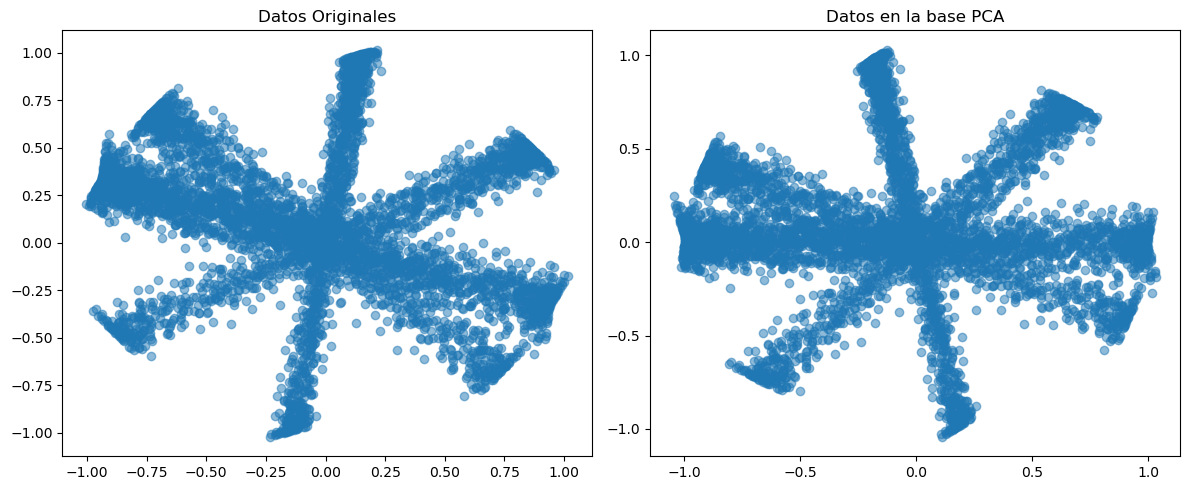

ModuleNotFoundError: No module named 'ace_tools'

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulación del movimiento del resorte a lo largo del eje x con ruido en y
N = 1000  # Número de muestras
t = np.linspace(0, 10, N)  # Tiempo
x = np.sin(t)  # Movimiento oscilatorio en x
y = np.random.normal(0, 0.1, N)  # Pequeño ruido en y

# 2. Definir n cámaras con ángulos aleatorios en coordenadas esféricas
n_cameras = 5
theta = np.random.uniform(0, np.pi, n_cameras)  # Ángulo en esféricas
phi = np.random.uniform(0, 2*np.pi, n_cameras)  # Ángulo en esféricas

# 3. Rotar el dataset para simular la vista de cada cámara
cameras_data = []
for i in range(n_cameras):
    xi = x * np.cos(theta[i]) + y * np.sin(theta[i]) * np.cos(phi[i])
    yi = x * np.sin(theta[i]) + y * np.cos(theta[i]) * np.sin(phi[i])
    cameras_data.append(np.vstack((xi, yi)))

X = np.hstack(cameras_data)  # Construir el dataset con todas las vistas

# 4. Aplicar PCA
cov_matrix = np.cov(X)
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# 5. Transformar los datos a la base PCA
X_pca = eigvecs.T @ X

# 6. Graficar resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Datos originales proyectados en la primera cámara
axes[0].scatter(X[0], X[1], alpha=0.5)
axes[0].set_title("Datos Originales")

# Datos transformados en la base PCA
axes[1].scatter(X_pca[0], X_pca[1], alpha=0.5)
axes[1].set_title("Datos en la base PCA")

plt.tight_layout()
plt.show()

# 7. Mostrar proporción de varianza explicada
explained_variance = eigvals / np.sum(eigvals)
import ace_tools as tools
import pandas as pd

results_spring = pd.DataFrame({
    "Eigenvalues": eigvals,
    "Explained Variance": explained_variance
})

tools.display_dataframe_to_user(name="PCA Spring Simulation Results", dataframe=results_spring)


In [5]:
#El primer componente principal representa el movimiento oscilatorio real, mientras que el segundo es ruido o efectos menores

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [22]:
# get the dataset and its description on the proper data directory
!curl -L -o magic04.data https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
!curl -L -o magic04.names https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  307k    0  307k    0     0   230k      0 --:--:--  0:00:01 --:--:--  230k
100  967k    0  967k    0     0   422k      0 --:--:--  0:00:02 --:--:--  423k
100 1442k    0 1442k    0     0   466k      0 --:--:--  0:00:03 --:--:--  467k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5400    0  5400    0     0  10508      0 --:--:-- --:--:-- --:--:-- 10567


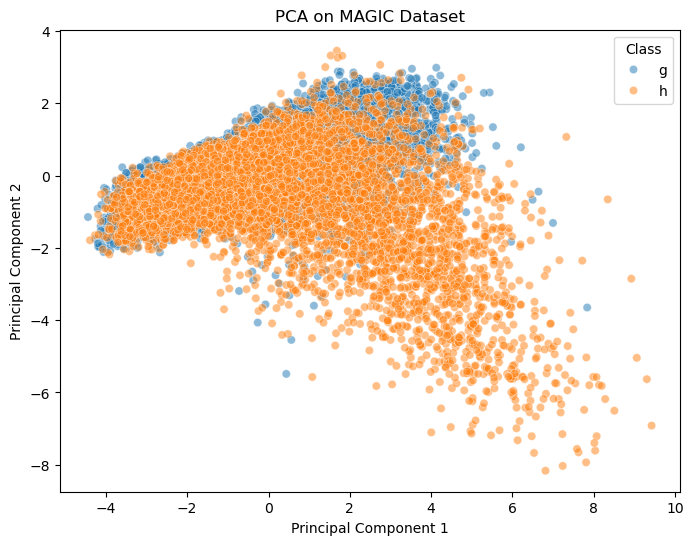

In [24]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = r"C:\Users\hassa/magic04.data"
df_magic = pd.read_csv(file_path, header=None)

# Asignar nombres a las columnas (según la descripción del dataset en UCI)
columns = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]
df_magic.columns = columns

# Separar características (X) y variable objetivo (y)
X = df_magic.drop(columns=["class"])  # Features
y = df_magic["class"]  # Target (g or h)

# Estandarizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir los resultados de PCA en un DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = y  # Agregar la clase original

# Graficar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="class", alpha=0.5)
plt.title("PCA on MAGIC Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.show()
